In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/TabularPS/test.csv")
data_train = pd.read_csv("/content/drive/MyDrive/TabularPS/train.csv")

In [ ]:
data_test.head(5)

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-9.536743e-07,-0.000002,-9.153442e-07,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,-9.536743e-07,-0.000003,-0.000017,-0.000074,0.000038,0.000068,0.000164,0.000180,-0.000003,-0.000025,-0.000009,0.000004,-0.000101,-0.000171,0.000006,0.000330,0.000580,0.000228,-0.000015,-0.000016,-0.000026,-0.000146,-0.000075,0.000212,0.000565,0.000359,0.000072,-0.000005,-0.000043,...,0.000163,0.000105,0.000178,0.000151,0.000156,5.572839e-05,0.000258,0.000321,0.000204,0.000006,0.000180,0.000540,0.000490,0.000174,0.000175,0.000447,0.000262,0.000279,0.000254,0.000111,0.000043,0.000150,0.000192,0.000076,0.000191,0.000387,0.000214,0.000184,0.000268,0.000121,0.000039,0.000085,0.000055,0.000108,0.000090,0.000059,0.000010,0.000006,0.000027,4.632568e-08
1,200001,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,0.001800,-0.000240,0.001800,-0.000114,0.000957,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,0.001199,0.001798,0.000798,0.000199,0.000657,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,0.001597,0.002996,-0.002403,0.000798,-0.000343,-0.000043,-0.000114,-0.000801,0.003597,0.001995,0.002995,-0.000403,0.001199,-0.000114,-0.000200,...,-0.002807,0.000597,0.000798,0.001798,0.000760,-2.002716e-04,0.000199,0.001798,0.000199,-0.000200,-0.000801,0.000597,-0.000403,0.000199,-0.001202,0.000597,0.001798,0.000199,0.001199,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,0.002657,-0.000343,-0.000343,-0.000114,-0.000043,0.000914,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07
2,200002,4.632568e-08,0.000003,8.465576e-08,-0.000014,0.000007,-0.000005,-0.000004,0.000003,0.000004,-0.000008,-9.536743e-07,-0.000003,-0.000003,-0.000045,-0.000038,-0.000110,-0.000127,-0.000076,-0.000012,-0.000004,-0.000005,0.000009,-0.000052,-0.000110,-0.000280,-0.000220,-0.000165,-0.000048,-0.000023,-0.000005,-0.000006,-0.000073,-0.000154,-0.000332,-0.000287,-0.000172,-0.000035,0.000006,-0.000007,...,0.000699,0.000423,0.000300,0.000281,0.000104,3.172839e-05,0.000097,0.000247,0.000162,0.000073,0.000156,0.000623,0.000478,0.000213,0.000264,0.000560,0.000420,0.000304,0.000329,0.000112,0.000039,0.000142,0.000155,0.000080,0.000177,0.000428,0.000250,0.000251,0.000338,0.000122,0.000041,0.000102,0.000084,0.000111,0.000117,0.000070,0.000020,0.000030,0.000021,4.632568e-08
3,200003,-9.536743e-07,-0.000008,8.084656e-06,0.000216,0.000420,0.000514,0.000452,0.000187,-0.000005,-0.000008,4.632568e-08,-0.000006,-0.000024,0.000060,0.000712,0.001579,0.001887,0.001299,0.000203,-0.000041,-0.000009,-0.000016,-0.000128,0.000128,0.001283,0.002351,0.002028,0.000670,-0.000037,-0.000025,-0.000063,-0.000171,0.000338,0.001279,0.001807,0.000838,0.000039,-0.000053,-0.000068,...,-0.000282,-0.000026,0.000226,0.000190,0.000284,7.283936e-07,0.000168,0.000405,0.000378,0.000037,0.000044,0.000462,0.000797,0.000306,0.000091,0.000766,0.000449,0.000417,0.000425,0.000222,0.000049,0.000185,0.000304,0.000134,0.000204,0.000635,0.000431,0.000317,0.000460,0.000215,0.000069,0.000158,0.000098,0.000175,0.000217,0.000150,0.000018,0.000016,0.000051,-9.536743e-07
4,200004,-9.536743e-07,-0.000010,-4.291534e-05,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-0.000086,-0.000343,-0.000801,-0.001

In [ ]:
data_train.head(5)

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,...,-0.002403,0.008798,-0.001202,0.009760,-0.000200,-0.000801,-0.001202,-0.000801,-0.000200,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,-0.000343,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Streptococcus_pyogenes
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,0.000199,-0.000202,0.001798,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,0.001798,-0.000403,0.001996,0.003597,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.000403,0.002995,0.002995,0.000597,0.001199,-0.000114,-0.000200,...,0.000597,0.002798,0.001798,0.000760,-0.000200,-0.000801,-0.000202,-0.000801,0.000800,0.000199,0.003597,0.001597,-0.000801,-0.000202,-0.001403,0.000798,0.001199,0.001199,0.000800,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,0.001313,0.000657,0.001657,0.001657,0.000886,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,Salmonella_enterica
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,4.632568e-08,-0.000004,1.693115e-07,0.000008,0.000366,0.000766,0.000937,0.000632,0.000101,-0.000021,-0.000008,8.465576e-08,-0.000080,0.000114,0.000710,0.001307,0.001065,0.000375,-0.000017,-0.000017,-0.000014,-0.000094,0.000183,0.000817,0.000968,0.000469,-0.000007,-0.000017,-0.000031,...,-0.000031,0.000146,0.000118,0.000156,0.000003,0.000080,0.000219,0.000225,0.000017,0.000014,0.000319,0.000355,0.000175,0.000030,0.000347,0.000229,0.000203,0.000238,0.000120,0.000027,0.000097,0.000159,0.000070,0.000138,0.000315,0.000214,0.000178,0.000296,0.000118,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,Salmonella_enterica
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,-9.536743e-07,-0.000010,-1.783069e-05,0.000068,0.000722,0.001594,0.001913,0.001111,0.000247,-0.000047,-0.000010,-1.891534e-05,-0.000138,0.000161,0.001345,0.002526,0.002155,0.000754,-0.000029,-0.000025,-0.000034,-0.000179,0.000345,0.001427,0.001964,0.000861,-0.000038,-0.000050,-0.000067,...,-0.000075,0.000284,0.000251,0.000296,-0.000020,0.000194,0.000399,0.000407,0.000040,0.000058,0.000505,0.000784,0.000296,0.000128,0.000835,0.000445,0.000401,0.000412,0.000246,0.000047,0.000160,0.000309,0.000129,0.000243,0.000597,0.000428,0.000363,0.000472,0.000197,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,Salmonella_enterica
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536

In [ ]:
data_train.columns

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0', 'A9T0G0C1',
       'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0', 'target'],
      dtype='object', length=288)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 288 entries, row_id to target
dtypes: float64(286), int64(1), object(1)
memory usage: 439.5+ MB


In [ ]:
df1 = data_train.drop(['target','row_id'], axis = 1)
columns = df1.columns
columns
X = np.array(data_train[columns])

In [ ]:
df2 = data_test.drop('row_id', axis = 1)
X_test = np.array(df2)
X_test = torch.FloatTensor(X_test)

In [ ]:
X = torch.FloatTensor(X)

In [ ]:
data_train = pd.get_dummies(data_train, columns=["target"])

In [ ]:
data_train.head(5)

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,...,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target_Bacteroides_fragilis,target_Campylobacter_jejuni,target_Enterococcus_hirae,target_Escherichia_coli,target_Escherichia_fergusonii,target_Klebsiella_pneumoniae,target_Salmonella_enterica,target_Staphylococcus_aureus,target_Streptococcus_pneumoniae,target_Streptococcus_pyogenes
0,0,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,...,-0.000801,-0.002403,-0.002403,-0.000801,-0.001202,-0.002403,-0.001202,-0.000801,-0.000801,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,-0.000687,-0.000343,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000086,-0.000086,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0,0,0,0,0,0,0,0,0,1
1,1,-9.536743e-07,-0.000010,-0.000043,0.000886,-0.000200,0.000760,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,0.000199,-0.000202,0.001798,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,0.001798,-0.000403,0.001996,0.003597,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.000403,0.002995,0.002995,0.000597,0.001199,-0.000114,-0.000200,...,0.000199,0.003597,0.001597,-0.000801,-0.000202,-0.001403,0.000798,0.001199,0.001199,0.000800,-0.000114,-0.000343,-0.000343,-0.000114,-0.000343,0.001313,0.000657,0.001657,0.001657,0.000886,-0.000043,-0.000086,-0.000043,0.000914,0.000914,-0.000043,-0.000010,-0.000010,-0.000010,-9.536743e-07,0,0,0,0,0,0,1,0,0,0
2,2,-9.536743e-07,-0.000002,0.000007,0.000129,0.000268,0.000270,0.000243,0.000125,0.000001,-0.000007,4.632568e-08,-0.000004,1.693115e-07,0.000008,0.000366,0.000766,0.000937,0.000632,0.000101,-0.000021,-0.000008,8.465576e-08,-0.000080,0.000114,0.000710,0.001307,0.001065,0.000375,-0.000017,-0.000017,-0.000014,-0.000094,0.000183,0.000817,0.000968,0.000469,-0.000007,-0.000017,-0.000031,...,0.000014,0.000319,0.000355,0.000175,0.000030,0.000347,0.000229,0.000203,0.000238,0.000120,0.000027,0.000097,0.000159,0.000070,0.000138,0.000315,0.000214,0.000178,0.000296,0.000118,0.000042,0.000084,0.000048,0.000081,0.000106,0.000072,0.000010,0.000008,0.000019,1.046326e-06,0,0,0,0,0,0,1,0,0,0
3,3,4.632568e-08,-0.000006,0.000012,0.000245,0.000492,0.000522,0.000396,0.000197,-0.000003,-0.000007,-9.536743e-07,-0.000010,-1.783069e-05,0.000068,0.000722,0.001594,0.001913,0.001111,0.000247,-0.000047,-0.000010,-1.891534e-05,-0.000138,0.000161,0.001345,0.002526,0.002155,0.000754,-0.000029,-0.000025,-0.000034,-0.000179,0.000345,0.001427,0.001964,0.000861,-0.000038,-0.000050,-0.000067,...,0.000058,0.000505,0.000784,0.000296,0.000128,0.000835,0.000445,0.000401,0.000412,0.000246,0.000047,0.000160,0.000309,0.000129,0.000243,0.000597,0.000428,0.000363,0.000472,0.000197,0.000068,0.000151,0.000100,0.000180,0.000202,0.000153,0.000021,0.000015,0.000046,-9.536743e-07,0,0,0,0,0,0,1,0,0,0
4,4,-9.536743e-07,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-9.536743e-07,-0.000010,-8.583069e-05,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-4.291534e-05,-0.000343,-0.001202,

In [ ]:
cols = data_train.columns
cols

Index(['row_id', 'A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6',
       'A0T0G5C5', 'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2',
       ...
       'target_Bacteroides_fragilis', 'target_Campylobacter_jejuni',
       'target_Enterococcus_hirae', 'target_Escherichia_coli',
       'target_Escherichia_fergusonii', 'target_Klebsiella_pneumoniae',
       'target_Salmonella_enterica', 'target_Staphylococcus_aureus',
       'target_Streptococcus_pneumoniae', 'target_Streptococcus_pyogenes'],
      dtype='object', length=297)

In [ ]:
cols = cols[287:297]
cols = list(cols)
for i in range(len(cols)):
    string = cols[i]
    string = string[7:]
    cols[i]=string
print(len(cols))
print(cols)

10
['Bacteroides_fragilis', 'Campylobacter_jejuni', 'Enterococcus_hirae', 'Escherichia_coli', 'Escherichia_fergusonii', 'Klebsiella_pneumoniae', 'Salmonella_enterica', 'Staphylococcus_aureus', 'Streptococcus_pneumoniae', 'Streptococcus_pyogenes']


In [ ]:
columns

Index(['A0T0G0C10', 'A0T0G1C9', 'A0T0G2C8', 'A0T0G3C7', 'A0T0G4C6', 'A0T0G5C5',
       'A0T0G6C4', 'A0T0G7C3', 'A0T0G8C2', 'A0T0G9C1',
       ...
       'A8T0G0C2', 'A8T0G1C1', 'A8T0G2C0', 'A8T1G0C1', 'A8T1G1C0', 'A8T2G0C0',
       'A9T0G0C1', 'A9T0G1C0', 'A9T1G0C0', 'A10T0G0C0'],
      dtype='object', length=286)

In [ ]:
y = data_train.drop(columns, axis = 1)

In [ ]:
y = y.drop('row_id', axis = 1)

In [ ]:
y = np.array(y)
y = torch.FloatTensor(y)

In [ ]:
print(X.shape)
print(y.shape)

torch.Size([200000, 286])
torch.Size([200000, 10])


In [ ]:
(X_train, X_eval, y_train, y_eval) = train_test_split(X, y, test_size=0.1, random_state=0)

#Neural Network

In [ ]:
model = nn.Sequential(
    nn.Linear(286,286),
    nn.ReLU(),
    nn.BatchNorm1d(num_features=286, eps=1e-05),
    nn.Linear(286,286),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.BatchNorm1d(num_features=286, eps=1e-05),
    nn.Linear(286,100),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.BatchNorm1d(num_features=100, eps=1e-05),
    nn.Linear(100,10),
    nn.Softmax(dim=1)
)

In [ ]:
learning_rate = 1e-6
n_epoch = 200

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [ ]:
def loader(X, Y, batch_size):    
    n = len(X)

    for start in range(0, n, batch_size):
        # в конце нам, возможно, нужно взять неполный батч
        end = min(start + batch_size, n)
        data = X[start:end]
        target = Y[start:end]
        yield data, target

In [ ]:
def accuracy(y_true, y_pred):
    acc = 0
    for i in range(y_true.shape[0]):
        if (torch.argmax(y_pred[i]) == torch.argmax(y_true[i])):
          acc += 1
    return acc/y_true.shape[0]

accuracy test= 0.982
accuracy train= 0.9895833333333334
epoch = 0


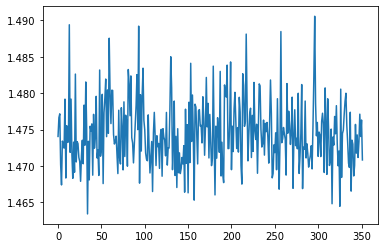

accuracy test= 0.98175
accuracy train= 0.9930555555555556
epoch = 1


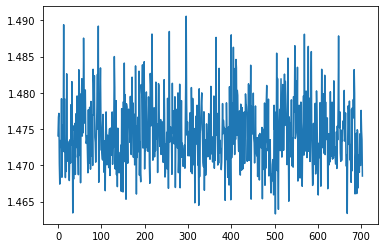

accuracy test= 0.9816
accuracy train= 0.9930555555555556
epoch = 2


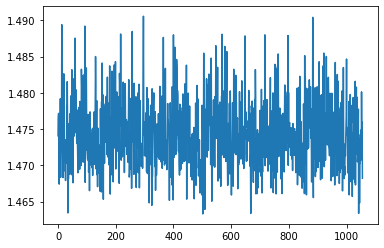

accuracy test= 0.9819
accuracy train= 0.9930555555555556
epoch = 3


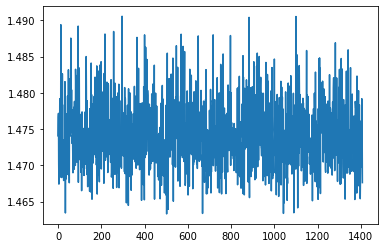

accuracy test= 0.9806
accuracy train= 0.9965277777777778
epoch = 4


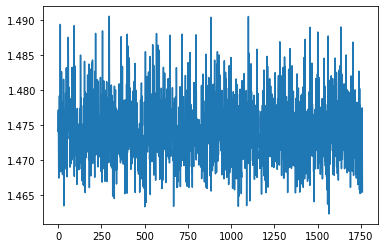

accuracy test= 0.98085
accuracy train= 0.9861111111111112
epoch = 5


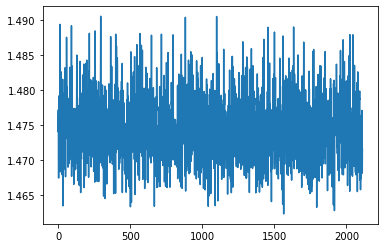

accuracy test= 0.98095
accuracy train= 0.9965277777777778
epoch = 6


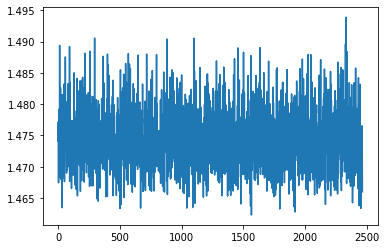

accuracy test= 0.9822
accuracy train= 0.9930555555555556
epoch = 7


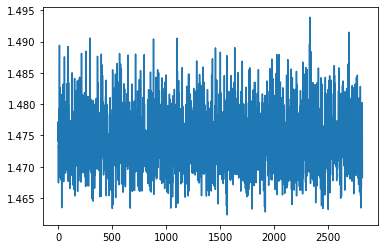

accuracy test= 0.9813
accuracy train= 0.9895833333333334
epoch = 8


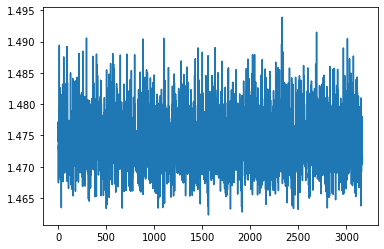

KeyboardInterrupt: ignored

In [ ]:
history = []
accs = []

for epoch in range(n_epoch):
    for x, t in loader(X_train, y_train, 512):
        
        optimizer.zero_grad()
        
        output = model(x)
        loss = criterion(output, t)
        history.append(loss.item())
        loss.backward()
        optimizer.step()
        
    acc = accuracy(t, output)
    accs.append(acc)
    acc_eval = accuracy(y_eval, model(X_eval))

    print('accuracy test=', acc_eval)
    print('accuracy train=', acc)
    print('epoch =', epoch)
        
    plt.plot(history)
    plt.show()


plt.plot(accs)
plt.show()

In [ ]:
test_ans = model(X_test)
ides = data_test['row_id']

In [ ]:
test_ans_str = [0 for i in range(X_test.shape[0])]

for i in range(test_ans.shape[0]):
    test_ans_str[i] = cols[int(torch.argmax(test_ans[i]))]

In [ ]:
list_tuples = list(zip(ides, test_ans_str)) 

dframe = pd.DataFrame(list_tuples, columns=['row_id', 'target'])

In [ ]:
dframe.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


In [ ]:
dframe.to_csv("/content/drive/MyDrive/TabularPS/submission.csv",index=False)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/TabularPS/model_NN.pt")

#XGB

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/TabularPS/train.csv")
y = dff['target']
(X_train, X_eval, y_train, y_eval) = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
params = {'max_depth': 10, 'subsample': 0.7, 'n_estimators': 5100, 'eta': 0.09999999999999999, 'reg_alpha': 1, 
              'reg_lambda': 73, 'min_child_weight': 5, 'colsample_bytree': 0.8377366123284274}

clf_xgb = xgb.XGBClassifier(random_state=42, tree_method='gpu_hist', gpu_id=0, 
                             predictor="gpu_predictor", **params)

clf_xgb.fit(X_train, y_train, eval_set=[(X_eval,y_eval)], early_stopping_rounds=150, verbose=False)
pred_xgb = clf_xgb.predict(X_eval)
acc = accuracy_score(y_eval, pred_xgb)

In [ ]:
clf_xgb.predict(X_test)

array(['Escherichia_fergusonii', 'Salmonella_enterica',
       'Enterococcus_hirae', ..., 'Bacteroides_fragilis',
       'Bacteroides_fragilis', 'Streptococcus_pyogenes'], dtype=object)

In [ ]:
ides = data_test['row_id']
list_tuples_xgb = list(zip(ides, clf_xgb.predict(X_test)))
dframe_xgb = pd.DataFrame(list_tuples_xgb, columns=['row_id', 'target'])

In [ ]:
dframe_xgb.shape

(100000, 2)

In [ ]:
dframe_xgb.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


In [ ]:
dframe_xgb.to_csv("/content/drive/MyDrive/TabularPS/submission_xgb.csv",index=False)

In [ ]:
torch.save(model.state_dict(), "/content/drive/MyDrive/TabularPS/model_XGB.pt")